# 2-3 가설 검정 개론

### import

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3
seaborn 0.12.2


## 1. 가설 검정의 틀

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

$H_0$: 귀무 가설(Null Hypothesis) 

- 통상적으로 받아들여지는 가설, 입증이 불필요

$H_1$: 대립 가설(Alternative Hypothesis)

- 귀무가설에 대립이 되는 가설, 주장하고자하는 가설. 입증이 필요
    
</div>

예) 무죄 추정의 원칙

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px; margin-left: 5px;">

$H_0$: 피고는 무죄입니다.

$H_1$: 피고는 유죄입니다.

검사는 피고는 유죄임을 입증하는 증거를 제시하여 피고가 유죄임을 보입니다.

판사는 제시된 증거를 가지고 판단합니다.

피고의 유죄임이 증거가 불충분하다면, 피고가 무죄라는 귀무가설은 기각하지 못합니다(Not Reject).

피고의 유죄임이 증거가 충분하다면, 피고가 무죄라는 귀무가설을 기각(Reject)합니다.

</div>

**검정 오류**

**False Positive**: Type-1 Error, False(잘못된) Positive($H_1$) - $H_1$으로 결론낸 것이 잘못됨

**False Negative**: Type-2 Error, False(잘못된) Negative($H_0$) - $H_0$로 결론낸 것이 잘못됨

| Truth\Conclusion | $H_0$ Rejected | $H_0$ not Rejected |
|---------:|:--------:|:-----------:|
| $H_1$ is true  | TP(True Positive)  | FN(False Negative)<br/> Type 2 Error(2종 오류) |
| $H_0$ is true  | FP(False Positive) <br/> Type 1 Error(1종 오류) | TN(True Negative)  |


-----------------------------------------------

**pvalue**: 증거에 기반하여 귀무 가설을 기각한 것이 오류일 확률.

- Type-I 오류일 확률


**유의 수준(significance level, $\alpha$)**: 귀무가설 기각을 판단하기 위한 pvalue의 기준점

귀무 가설에 유리하게 가설 검정을 바라봅니다.

- pvalue가 유의 수준 보다 크거나 **같으면** $H_0$을  택합니다.


- 이런 관점에서, **pvalue**의 정의를 "증거에 기반하여 귀무 가설을 기각한 것이 오류일 확률의 **최대값**"으로 확장됩니다

> 귀무 가설이 특정 값이 아닌 범위 일 때, 
>
> 귀무 가설이 취하는 범위 중에서 pvalue가 가장 큰 값이 되는 경우로 pvalue를 구합니다.

**pvalue의 계산**

- Type-I 오류의 의미에서 False Positive → 귀무 가설이 맞다.


- 귀무 가설이 맞다는 가정과 주어진 조건을 이용하여 증거의 확률 분포를 구합니다. 


- 확률을 구할 통계량의 영역에 따른 검정 종류 파악


|대립 가설이 지지하는 통계량의 영역|검정 종류|pvalue 계산법|
|----|----|:----|
|좌측|좌측(left) 꼬리 검정|pvalue를 검정통계량 기준으로 확률 분포의 좌측 꼬리 영역을 계산|
|우측|우측(right) 꼬리 검정|pvalue를 검정통계량 기준으로 확률 분포의 우측 꼬리 영역을 계산|
|양쪽|양측(two-sided) 꼬리 검정|i. 대칭 분포일 경우: 좌측 꼬리에 해당하는 검정통계량을 구하고 좌측 꼬리 영역을 계산값의 2배를 취합니다.<br/>ii. 비대칭 분포일 경우: 기각역을 구하여 판단하거나, pvalue의 근사값을 구합니다.<br/>※ 이 때 정확한 pvalue는 구할 수 없으며, 꼬리 영역의 너비가 작은 쪽의 2배를 취하여 어림 잡습니다.|


## 2. 통계적 가설 검정의 절차

### pvalue를 통한 방법

1. $H_0$와 $H_1$을 설정합니다.


2. 수집된 증거(통계량)와 제시된 정보에서 pvalue를 구할 방법을 찾습니다.

> 귀무 가설이 맞다는 가정하에 증거가 가지는 확률 분포와 검정 통계량을 도출합니다.


3. pvalue를 계산합니다.


4. pvalue와 유의 수준을 비교하여 결론을 냅니다.

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

OO 치즈는 슬라이스 당 무게가 20g 이라고 표시가 되어 있습니다.

소비자 고발원에 OO 치즈의 슬라이스 당 무게가 20g이 되지 않는다는 사건이 접수가 되었습니다.

포장 기계에는 발생할 수 표준편차가 0.4g 이라고 적혀 있었고, 이 기계에서 발생하는 오차는 맞다고 가정합니다.

이를 위해 30개의 표본 슬라이스의 무게를 측정한 결과를 가지고 (30개는 표본의 평균이 정규분포를 따르기에 충분한 표본 수라고 가정합니다.)

소비자의 주장을 받아들일 수 있는지 분석을 해봅니다. (유의 수준: 0.05)

치즈 슬라이스 표본의 무게(g)

```
19.37, 20.20, 19.91, 19.20, 19.57, 20.46, 18.83, 19.63, 20.31, 19.45, 
19.53, 19.76, 20.40, 19.54, 19.62, 19.63, 20.68, 20.67, 20.20, 19.95, 
20.09, 20.40, 19.43, 20.27, 19.30, 19.54, 20.16, 19.23, 19.74, 19.46
```
</div>

$H_0$: 치즈 슬라이스 무게(의 모평균) = 20g 

$H_1$: 치즈 슬라이스 무게(의 모평균) < 20g

In [2]:
# 수집된 증거
X = [
    19.37, 20.20, 19.91, 19.20, 19.57, 20.46, 18.83, 19.63, 20.31, 19.45, 
    19.53, 19.76, 20.40, 19.54, 19.62, 19.63, 20.68, 20.67, 20.20, 19.95, 
    20.09, 20.40, 19.43, 20.27, 19.30, 19.54, 20.16, 19.23, 19.74, 19.46
]

**[풀이]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

**pvalue 계산에 활용될 수 있는 정보**

- $H_0$ 가 맞다는 가정하에서 나오는 정보: μ(모평균) = 20g


- 문제에서 나오는 정보: σ(모표준편차) = 0.4g


- 표본수 30개는 표본평균의 분포가 정규분포를 따른다고 할 수 있습니다.


**증거의 확률 분포 및 통계량**


- 표본의 평균 $\sim N(20, \frac{0.4^2}{30})$ 


- 검정 통계량(Z) = $\frac{\bar{X}-20}{0.4/\sqrt{30}}$


**검정의 종류**

- **왼쪽(left) 꼬리 검정**:검정 통계량보다 작은 값이 대립 가설을 더 지지합니다. 
    
</div>

In [3]:
from scipy.stats import norm, t

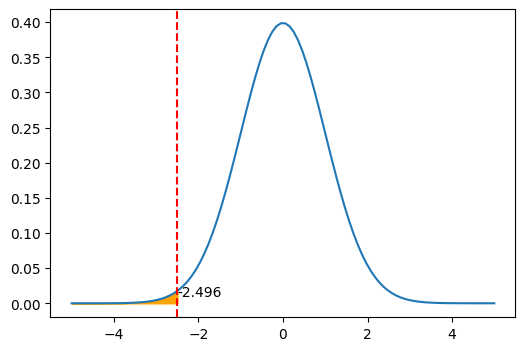

In [4]:
# 표준정규 분포를 이용한 pvalue 도출을 그래프로 설명
X_bar = np.mean(X)

mu_X_bar = 20
sigma_X_bar = 0.4 / (30 ** 0.5)

# 검정통계량
Z = (X_bar - mu_X_bar) / sigma_X_bar

plt.figure(figsize=(6, 4))
plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(Z, color='red', linestyle='--')
plt.text(Z, 0.01, str(Z)[:6])
plt.fill_between(np.linspace(-5, Z, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-5, Z, 100)), color='orange')
plt.show()

In [5]:
pvalue = norm.cdf(Z)
print("검정 통계량: {}, pvalue: {}".format(Z, pvalue))

검정 통계량: -2.4967019912943202, pvalue: 0.006267712680399341


결론: pvalue가 유의 수준(0.05) 보다 작으므로, 귀무 가설을 기각합니다.

### 기각역에 의한 방법

- **기각역**(rejection region): 귀무가설이 기각되는 검정 통계량의 구간


- **임계값**(critical value): 기각역의 경계점의 통계량

1. $H_0$와 $H_1$을 설정합니다.


2. 수집된 증거(통계량)와 제시된 정보에서 기각역을 구할 방법을 정합니다.

> 귀무 가설이 맞다는 가정하에 증거가 가지는 확률 분포를 구하고, 유의 수준보다 pvalue가 작은 영역 도출


3. 수집된 증거의 검정 통계량을 구합니다.


4. 기각역과 통계량을 바탕으로 결론을 냅니다.

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 검정을 기각역에 의한 방법으로 가설 검정을 수행합니다.
    
</div>

**[풀이]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

**pvalue 계산에 활용될 수 있는 정보**

- $H_0$ 가 맞다는 가정하에서 나오는 정보: μ(모평균) = 20g


- 문제에서 나오는 정보: σ(모표준편차) = 0.4g


- 표본수 30개는 표본평균의 분포가 정규분포를 따른다고 할 수 있습니다.


**증거의 확률 분포 및 통계량**

- $\bar{X} \sim N(20, \frac{0.4^2}{30})$ 

- 검정 통계량(Z) = $\frac{\bar{X}-20}{{0.4}/\sqrt{30}}$

**검정의 종류**

- **왼쪽(left) 꼬리 검정**: 검정 통계량보다 작은 값이 대립 가설을 더 지지합니다. 

**임계값**

- $Z_{lb}$ = norm.ppf(0.05)
    
</div>

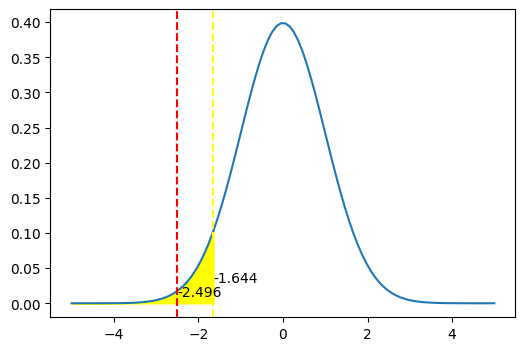

In [6]:
# 표준정규 분포를 이용한 pvalue 도출을 그래프로 설명
X_bar = np.mean(X)

mu_X_bar = 20
sigma_X_bar = 0.4 / (30 ** 0.5)

# 임계값
cv = norm.ppf(0.05)

# 검정통계량
Z = (X_bar - mu_X_bar) / sigma_X_bar

plt.figure(figsize=(6, 4))
plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(Z, color='red', linestyle='--')
plt.text(Z, 0.01, str(Z)[:6])

plt.axvline(cv, color='yellow', linestyle='--')
plt.text(cv, 0.03, str(cv)[:6])

plt.fill_between(np.linspace(-5, cv, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-5, cv, 100)), color='yellow')
plt.show()

In [7]:
pvalue = norm.cdf(Z)
print("검정 통계량: {}, 임계값: {}".format(Z, cv))

검정 통계량: -2.4967019912943202, 임계값: -1.6448536269514729


**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

OO 치즈는 슬라이스 당 무게를 20g 씩 잘라 만듭니다.

생산관리 부서에서 OO 치즈의 슬라이스 당 무게가 20g이 넘게 포장되고 있다고 주장을 했고,

포장기계에는 발생할 수 있는 표준편차가 0.4g 이라고 적혀 있지만, 생산 관리 부서는 이 내용을 인정하지 않고 있습니다.

하지만, 치즈 슬라이스 (모집단의) 무게는 정규분포를 따르고 있음을 인정합니다.

주어진 표본을 이용하여,

생산 관리 부서에서 최대한 납득할 수 있는 방법으로, 생산관리 부서의 주장을 받아들일 수 있는지 조사해봅니다. (유의 수준: 0.05)

치즈 슬라이스 표본의 무게(g)

19.89, 20.61, 21.25, 19.67, 19.72, 20.14, 20.40, 19.72, 20.35, 19.89, 

20.04, 20.12, 19.83, 19.31, 20.37, 20.68, 19.27, 19.69, 20.13, 20.07, 

20.09, 19.53, 20.14, 19.87, 19.78, 19.47, 19.53, 20.73, 19.92, 19.41
    
</div>

$H_0$: 치즈 슬라이스 무게(의 모평균) = 20g 

$H_1$: 치즈 슬라이스 무게(의 모평균) > 20g

In [8]:
X = [
    19.89, 20.61, 21.25, 19.67, 19.72, 20.14, 20.40, 19.72, 20.35, 19.89, 
    20.04, 20.12, 19.83, 19.31, 20.37, 20.68, 19.27, 19.69, 20.13, 20.07, 
    20.09, 19.53, 20.14, 19.87, 19.78, 19.47, 19.53, 20.73, 19.92, 19.41
]

**[풀이]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

**pvalue 계산에 활용될 수 있는 정보**

- $H_0$ 가 맞다는 가정하에서 나오는 정보: μ(모평균) = 20g


- 치즈 슬라이스의 무게는 정규 분포를 따르고 있습니다.

**증거의 확률 분포 및 통계량**

- $\bar{X} \sim t(\nu=29)$: 자유도가 29(표본수 - 1)인 t분포


- 검정 통계량(t) = $\frac{\bar{X}-20}{s/\sqrt{30}}$ 


**검정의 종류**

- **우측(right) 꼬리 검정** 검정 통계량보다 큰 값이 대립 가설을 더 지지합니다.

**임계값**

- $t_{ub}$ = t.ppf(0.95, df=29)
    
</div>

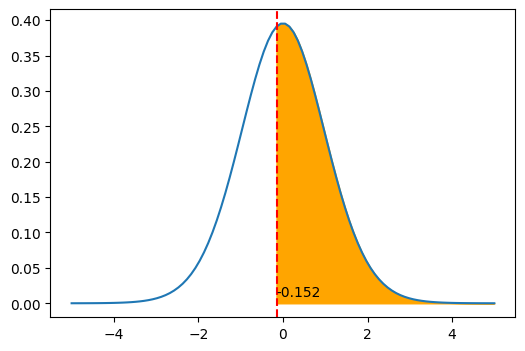

In [9]:
X_bar = np.mean(X)
mu_X_bar = 20
S = np.std(X, ddof=1) # ddof=1 표본표준편차

t_stat = (X_bar - mu_X_bar) / (S / (30 ** 0.5))
pvalue = t.sf(t_stat, df=29) # t.sf → 1 - t.cdf

plt.figure(figsize=(6, 4))
plt.plot(np.linspace(-5, 5, 100), t.pdf(np.linspace(-5, 5, 100), df=29))
plt.axvline(t_stat, color='red', linestyle='--')
plt.text(t_stat, 0.01, str(t_stat)[:6])
plt.fill_between(np.linspace(t_stat, 5, 100), np.zeros(shape=100),
                t.pdf(np.linspace(t_stat, 5, 100), df=29), color='orange')
plt.show()

In [10]:
print("검정통계량: {}, pvalue: {}".format(t_stat, pvalue))

검정통계량: -0.1525779020324071, pvalue: 0.5601061031909444


**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

☆☆ 커팅기는 종이 형태로 되어 있는 것을 일정한 길이로 자릅니다.

치즈 공장은 납품된 ☆☆ 커팅기의 정확도를 의심하고 있습니다. 

치즈 공장의 ☆☆ 커팅기는 5cm 길이로 치즈를 자르도록 되어 있지만, 

치즈 공장에서는 ☆☆ 커팅기가 5cm로 자르지 못한다고 합니다.

☆☆ 커팅기가 잘라낸, 치즈 슬라이스의 길이는 정규분포를 따르고 있음은 검증이 된 상태입니다.  (유의 수준: 0.05)

치즈 슬라이스 표본의 길이(cm)

```
4.89, 5.10, 5.03, 4.85, 4.94, 5.17, 4.76, 4.96, 5.13, 4.91, 

4.93, 4.99, 5.15, 4.94, 4.96, 4.96, 5.22, 5.22, 5.10, 5.04, 

5.07, 5.15, 4.91, 5.12, 4.87, 4.94, 5.09, 4.86, 4.99, 4.91
```
</div>

$H_0$: 치즈 슬라이스 길이(의 모평균) ＝ 5cm

$H_1$: 치즈 슬라이스 길이(의 모평균) ≠ 5cm

In [11]:
X = [
    4.89, 5.10, 5.03, 4.85, 4.94, 5.17, 4.76, 4.96, 5.13, 4.91, 
    4.93, 4.99, 5.15, 4.94, 4.96, 4.96, 5.22, 5.22, 5.10, 5.04, 
    5.07, 5.15, 4.91, 5.12, 4.87, 4.94, 5.09, 4.86, 4.99, 4.91
]

**[풀이]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

**pvalue 계산에 활용될 수 있는 정보**

- $H_0$ 가 맞다는 가정하에서 나오는 정보: μ(모평균) = 5cm

- 치즈 슬라이스의 무게는 정규 분포를 따르고 있습니다.

**증거의 확률 분포 통계량**

- $\bar{X} \sim t(k=29)$: 자유도가 29(표본수 - 1)인 t분포

- 검정 통계량(t) = -$|\frac{\bar{X}-5}{s/\sqrt{30}}|$, 양측 검증이라 좌측 꼬리에 해당하는 통계량

**검정의 종류**

- **양측(two-sided) 꼬리 검정**: 검정 통계량보다 중심에서 멀어질 수록 대립 가설을 지지합니다.

**임계값**

- $t_{lb}$ = t.ppf(0.025, df=29)
    
- $t_{ub}$ = t.ppf(0.975, df=29), 
    
</div>

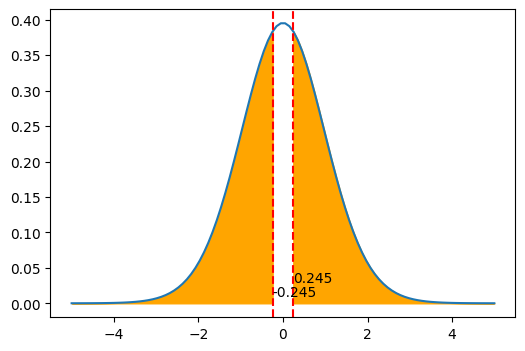

In [12]:
X_bar = np.mean(X)
mu_X_bar = 5
S = np.std(X, ddof=1) # ddof=1 표본표준편차

# t분포는 0을 기준으로 좌우 대칭입니다.
t_stat = -abs(X_bar - mu_X_bar) / (S / (30 ** 0.5)) # 좌측 꼬리를 구하도록 합니다.
pvalue = t.cdf(t_stat, df=29) * 2 # 좌측 꼬리를 구한 후 두 배를 합니다.

plt.figure(figsize=(6, 4))
plt.plot(np.linspace(-5, 5, 100), t.pdf(np.linspace(-5, 5, 100), df=29))
plt.axvline(t_stat, color='red', linestyle='--')
plt.text(t_stat, 0.01, str(t_stat)[:6])
plt.fill_between(np.linspace(-5, t_stat, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-5, t_stat, 100), df=29), color='orange')
plt.axvline(-t_stat, color='red', linestyle='--')
plt.text(-t_stat, 0.03, str(-t_stat)[:5])
plt.fill_between(np.linspace(-t_stat, 5, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-t_stat, 5, 100), df=29), color='orange')
plt.show()

In [13]:
print("검정통계량: {}, pvalue: {}".format(t_stat, pvalue))

검정통계량: -0.2455742912417193, pvalue: 0.8077414602588806
